In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the csv file and loading into a dataframe
df = pd.read_csv(r"C:\Users\Administrator\Desktop\Datatechcon\final projects ML\App_user_engagement.csv")

In [3]:
df.head()

,Spend,App Users clicks
0,22.61,165
1,37.28,228
2,55.57,291
3,45.42,247
4,50.22,290


In [4]:
df.tail()

,Spend,App Users clicks
35,65.26,412
36,50.17,286
37,85.14,479
38,91.51,592
39,65.33,362


In [5]:
#information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Spend             40 non-null     float64
 1   App Users clicks  40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


In [6]:
#summary statistics for the dataset
df.describe()

,Spend,App Users clicks
count,40.000000,40.000000
mean,48.145750,284.225000
std,22.679736,139.346918
min,1.120000,48.000000
25%,32.667500,176.500000
50%,48.235000,287.000000
75%,63.590000,356.250000
max,91.510000,593.000000


In [7]:
#checking for missing values
df.isnull().any()

Spend               False
App Users clicks    False
dtype: bool

In [8]:
#checking for duplicate values
df.duplicated().any()

False

In [9]:
df.columns

Index(['Spend', 'App Users clicks'], dtype='object')

In [10]:
#standardizing column names
lowercolumn = []
for i in range(len(df.columns)):
    lowercolumn.append(df.columns[i].replace(' ', '').lower())
df.columns = lowercolumn
df.columns

Index(['spend', 'appusersclicks'], dtype='object')

In [11]:
#renaming the column names
df.rename(columns = {'appusersclicks' : 'clicks'}, inplace=True)


In [12]:
df.columns

Index(['spend', 'clicks'], dtype='object')

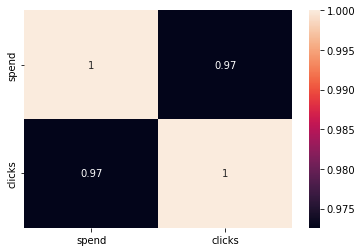

In [13]:
#correlation between hours and total_calls using a heatmap
dfviz = sns.heatmap(df[['spend', 'clicks']].corr(),annot=True)


In [14]:
# Checking the categorical columns.
cat_columns = [x for x in df.columns if df[x].dtype == 'O']
cat_columns

[]

In [15]:
#importing necessary machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [16]:
#identifyng the input feature X and output variable y in the df
X = df.drop(['clicks'], axis = 1)
y = df['clicks']
print(X.shape)
print(y.shape)

(40, 1)
(40,)


In [17]:
#split the data into train(80%) and test(20%) and check the shape after splitting.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32, 1)
(8, 1)
(32,)
(8,)


### Model Training

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #linearregression() function assigned to regressor
regressor.fit(X_train, y_train) #regressor.fit() performs the actual training on X and y.

LinearRegression()

In [19]:
#to retrieve the slope or coef
print(regressor.coef_)
#to retrieve the intercept
print(regressor.intercept_)

[5.9848097]
-4.863875223198306


### Model Testing

In [20]:
from sklearn.metrics import r2_score, mean_squared_error

# prediction score(r2)
regressor.score(X_test, y_test) #rsquared for test data

0.93172722814936

In [21]:
y_pred = regressor.predict(X_test)
y_pred

array([183.77732665, 144.87606358, 323.88172183, 295.69326812,
       373.25640189, 325.07868377, 133.02614036, 481.58145754])

In [22]:
#now, lets see the prediction on which th accuracy level is achieved.
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_pred.flatten()})
df

,Actual,Predicted
0,226,183.777327
1,175,144.876064
2,303,323.881722
3,290,295.693268
4,355,373.256402
5,291,325.078684
6,126,133.026140
7,533,481.581458


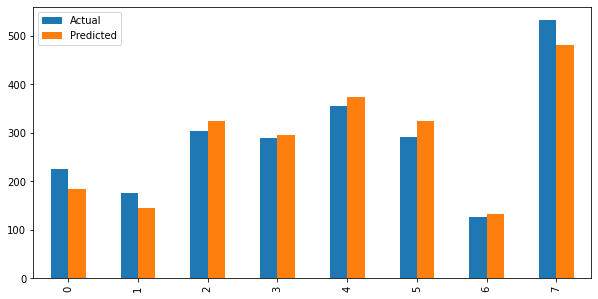

In [24]:
#creating a visual for the actual and predicted values.
df = df.head(8)
df.plot(kind ='bar', figsize=(10,5))
plt.show()

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2:', metrics.r2_score(y_true=y_test, y_pred=y_pred))

Mean Absolute Error: 26.212671025942512
Mean Squared Error: 918.3189192079344
Root Mean Squared Error: 30.303777309238768
r2: 0.93172722814936


#### 2. Random Forest Algorithm

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\Datatechcon\final projects ML\App_user_engagement.csv")

In [76]:
print(regressor.intercept_, regressor.coef_, regressor.score(X, y))

-4.863875223198306 [5.9848097] 0.9458528455905613


In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
#identifyng the input feature X and output variable y in the df
X = df.drop(['clicks'], axis = 1)
y = df['clicks']
print(X.shape)
print(y.shape)

(40, 1)
(40,)


In [26]:
features_label = df.columns[1:]
forest = RandomForestRegressor (n_estimators = 10000, random_state=0, n_jobs = -1)
forest.fit(X,y)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) clicks                         1.000000


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32, 1)
(8, 1)
(32,)
(8,)


In [29]:
#lets train the algorithm using random forest using 10k trees
forest_regressor = RandomForestRegressor ()
forest_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
from sklearn.model_selection import cross_val_score
cv_10_results = cross_val_score(forest_regressor, X, y, cv=10)
print(cv_10_results)

[0.22068032 0.73838566 0.85759132 0.82022422 0.91126681 0.34419773
 0.85035406 0.65008401 0.93931067 0.96033349]


In [31]:
#lets train the algorithm using random forest using 10k trees
forest_regressor = RandomForestRegressor (n_estimators = 1000, random_state = 0, n_jobs = -1)
forest_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

In [32]:
#now,lets test the model, predict on the X_test 229 rows and 19 columns
y_pred = forest_regressor.predict(X_test)

In [33]:
#now, lets see the prediction on which th accuracy level is achieved.
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_pred.flatten()})
df

,Actual,Predicted
0,226,182.085
1,175,130.717
2,303,307.192
3,290,286.573
4,355,399.286
5,291,308.158
6,126,151.986
7,533,483.999


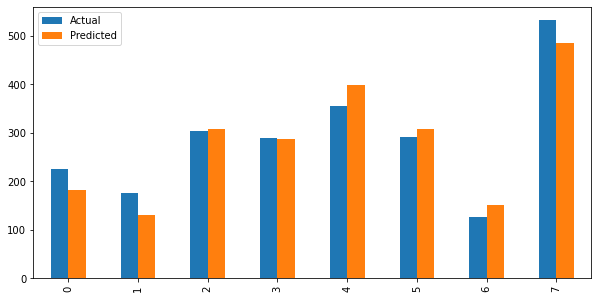

In [34]:
#Now, lets create a visual with the first 25 values.
df1 = df.head(25)
df1.plot(kind ='bar', figsize=(10,5))
plt.show()

In [35]:
#lets calculate performance of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2:', metrics.r2_score(y_true=y_test, y_pred=y_pred))

Mean Absolute Error: 29.031
Mean Squared Error: 1156.3556829999995
Root Mean Squared Error: 34.00523023006902
r2: 0.9140302937548717
